<a href="https://colab.research.google.com/github/FranciscoMedellin/mna-computer-vision/blob/main/f_equipo33_region_growing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en inteligencia Artificial Aplicada.**##

**TC4033.10 Visión Computacional para imágenes y video**

9.6 Comparación de métodos de segmentación (Demo en Google Colab)

Equipo #33
* Jonathan Alberto López Rodríguez - A01794938

* Francisco Medellin Zertuche - A01794044

* Edgar Rusef Hernández García - A01795076

* Patricio Mondragon Fernandez - A01748352

In [ ]:
img_path = 'https://raw.githubusercontent.com/FranciscoMedellin/mna-computer-vision/refs/heads/main/images/' #image1.png
images = ['image1.png', 'image2.png', 'image3.png', 'image4.png', 'image5.png','braing-rigth-side.jpg']

In [ ]:
import urllib.request

def get_web_image(url):
  """
  Return img based on url, example: "https://raw.githubusercontent.com/FranciscoMedellin/mna-computer-vision/refs/heads/main/print-after-segmentation.png"
  """
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return img

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image_path, seed=None, lo_diff=5, up_diff=50, new_val=100, use_darkest_pixel=False):
    """
    Implementa el algoritmo de crecimiento de regiones mediante cv2.floodFill.

    Inputs:
    - image_path: Ruta de la imagen a procesar.
    - seed: Punto de inicio (x, y). Si es None, se usa el centro o el píxel más oscuro.
    - lo_diff: Diferencia mínima de intensidad permitida. Valor de ejemplo: 5
    - up_diff: Diferencia máxima de intensidad permitida. Valor de ejemplo: 50
    - new_val: Valor con el que se llenará la región. 100
    - use_darkest_pixel: Si es True, usa el píxel más oscuro como semilla.
    """
    # Cargar la imagen en escala de grises
    # image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen '{image_path}'. Verifica la ruta.")
        return

    # Copiar la imagen original para comparaciones
    original_image = image.copy()

    # Crear una máscara con tamaño 2 píxeles más grande en cada dimensión (requerido por floodFill)
    height, width = image.shape
    mask = np.zeros((height + 2, width + 2), np.uint8)

    # Definir la semilla de crecimiento
    if seed is None:
        if use_darkest_pixel:
            # Encontrar el píxel más oscuro de la imagen
            y, x = np.unravel_index(np.argmin(image), image.shape)
            seed = (x, y)
        else:
            # Usar el centro de la imagen como semilla
            seed = (width // 2, height // 2)

    # print(f"Procesando '{image_path}' con semilla en {seed}")
    print(f"Procesando, ' con semilla en {seed}")


    # Aplicar el algoritmo de Region Growing usando cv2.floodFill
    cv2.floodFill(image, mask, seedPoint=seed, newVal=new_val, loDiff=(lo_diff,), upDiff=(up_diff,))

    # Mostrar la imagen original y segmentada
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Imagen original
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title("Imagen Original")
    ax[0].axis("off")

    # Imagen procesada
    ax[1].imshow(image, cmap='gray')
    ax[1].set_title("Segmentación con Region Growing")
    ax[1].axis("off")

    plt.show()

Procesando, ' con semilla en (468, 142)


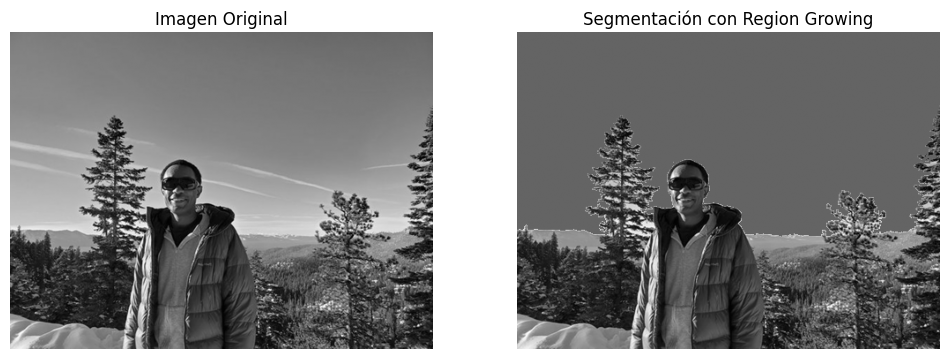

In [ ]:
img = get_web_image(img_path + images[2])
region_growing(img, use_darkest_pixel=True)

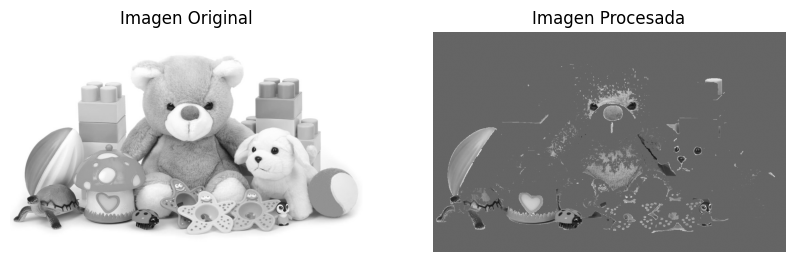

In [ ]:
region_growing("toys.png")

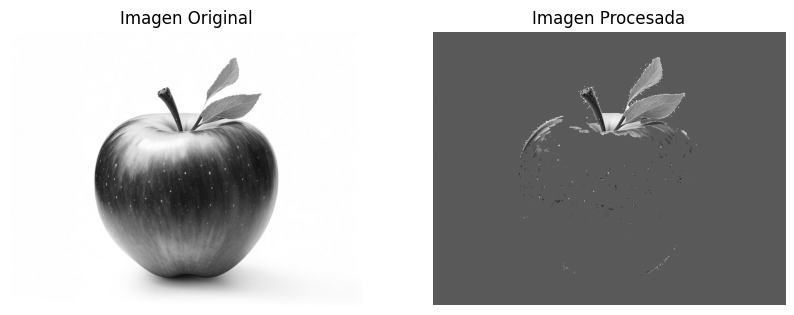

In [ ]:
region_growing("manzana.jpg")

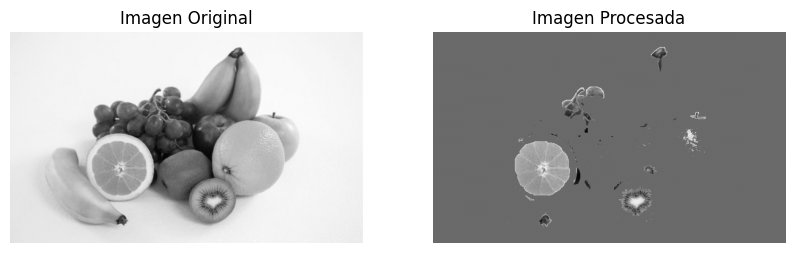

In [ ]:
region_growing("frutas.jpg")

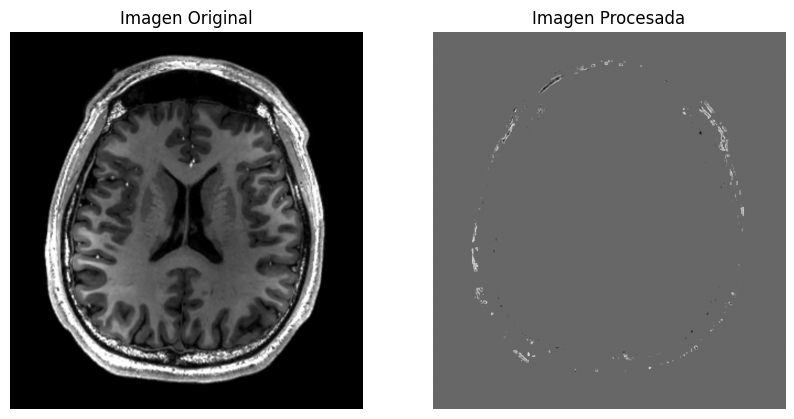

In [ ]:
region_growing("mri.jpg")

Procesando, ' con semilla en (254, 0)


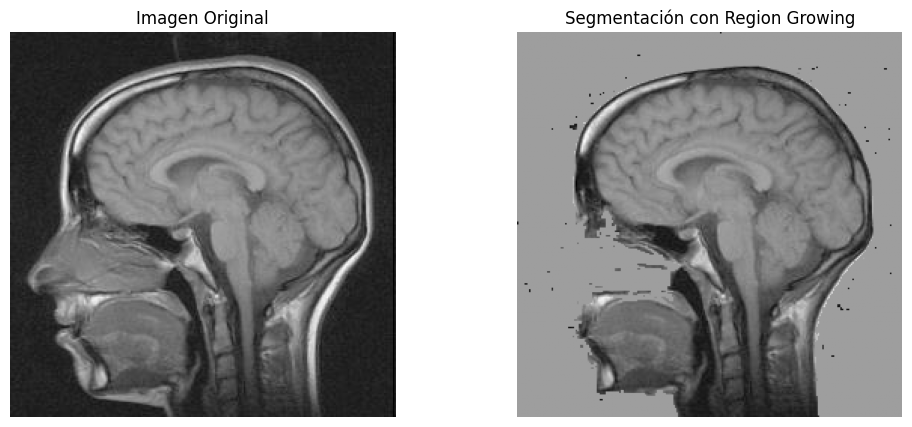

In [ ]:
img = get_web_image(img_path + images[5])
region_growing(img,lo_diff= 6, up_diff=55, new_val=160 ,use_darkest_pixel=True)

Procesando, ' con semilla en (253, 148)


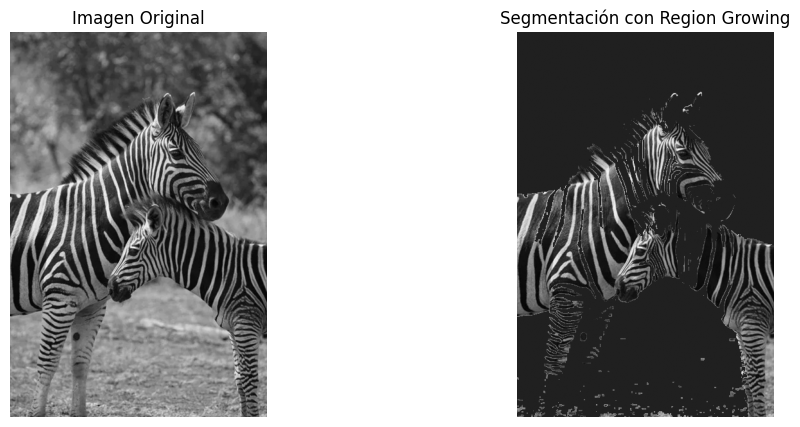

In [ ]:
img = get_web_image(img_path + images[3])
region_growing(img,lo_diff= 9, up_diff= 25, new_val=45 ,use_darkest_pixel=True)

Procesando, ' con semilla en (0, 0)


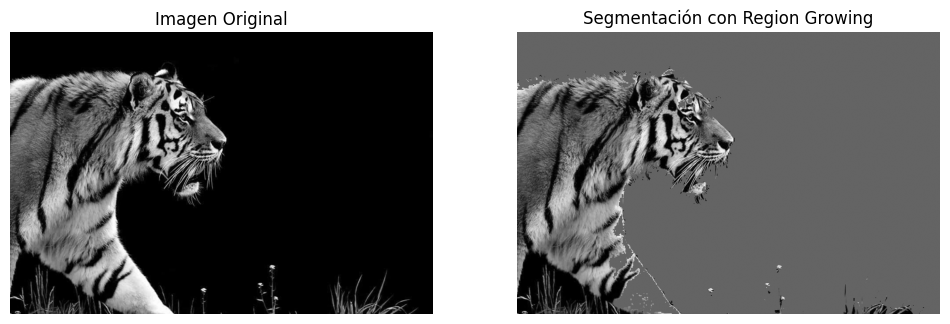

In [ ]:
img = get_web_image(img_path + images[4])
region_growing(img, use_darkest_pixel=True)